## Data Description

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. We have to build a model to predict the total sales generated from all the sales channel using the given data of money spent on each channel.  

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv(r"Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Our data has no null values and data-type for each column is float

In [4]:
df.shape

(200, 5)

No. of rows=200

no. of columns=5

In [5]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Univariate Analysis

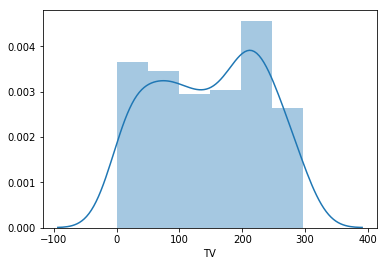

In [6]:
sns.distplot(df["TV"])

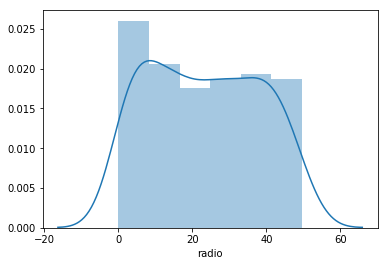

In [7]:
sns.distplot(df["radio"])

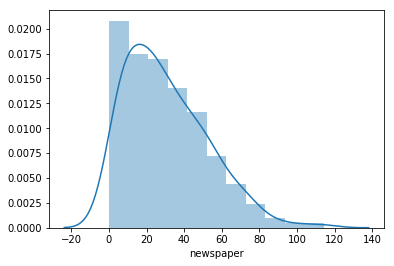

In [8]:
sns.distplot(df["newspaper"])

We observe skewed data in "newspaper" feature and all the features are not normally distributed

### Bivariate Analysis

#### TV v/s sales

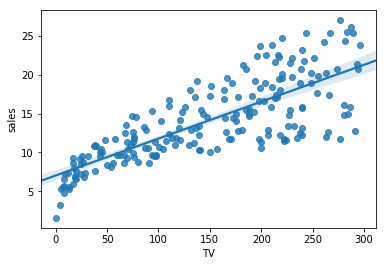

In [9]:
sns.regplot(x="TV", y="sales", data= df)

#### radio v/s sales

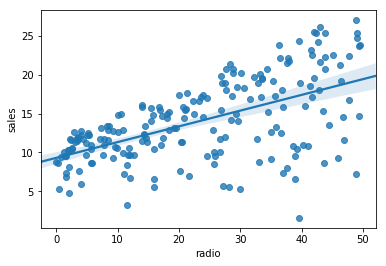

In [10]:
sns.regplot(x="radio", y="sales", data= df)

#### newspaper v/s sales

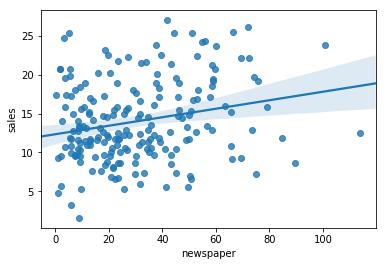

In [11]:
sns.regplot(x="newspaper", y="sales", data= df)

From above three plots we observe that all the features have positive relationship with target variable. With increase in investment in TV and radio we observe a greater increase in sales as compared to that in newspaper.

### Correlation

In [12]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


#### Plotting of heatmap

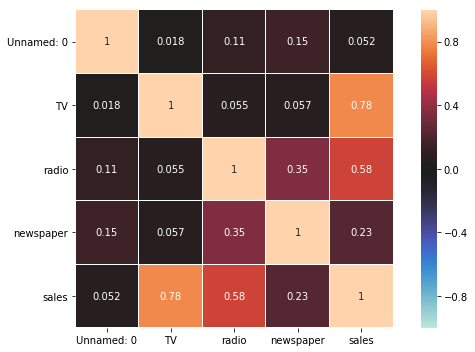

In [13]:
df_corr= df.corr().abs()
plt.figure(figsize=(8,5))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

All three features are positively correlated to sales. TV is 78% correlated to sales, radio is 58% corelated and newspaper is 23% correlated.

Max Correlation: TV

Min Correlation: newspaper

### Check for outliers

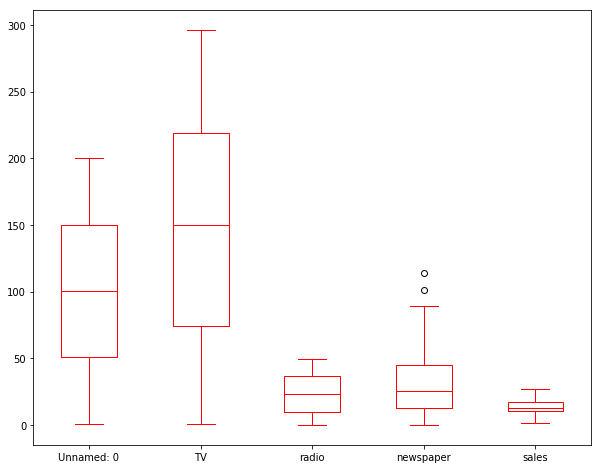

In [14]:
df.plot(kind='box', figsize=(10,8), color='r')

We observe very less outliers in newspaper column

## Data Cleaning

In [15]:
df=df.drop(columns=["Unnamed: 0"],axis=1)

#### Removing Outliers

In [16]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
iqr= Q3-Q1

In [17]:
## Removing outliers
index= np.where(df['newspaper']>(Q3.newspaper+ 1.5*iqr.newspaper))
df=df.drop(df.index[index])
df.reset_index

<bound method DataFrame.reset_index of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
5      8.7   48.9       75.0    7.2
6     57.5   32.8       23.5   11.8
7    120.2   19.6       11.6   13.2
8      8.6    2.1        1.0    4.8
9    199.8    2.6       21.2   10.6
10    66.1    5.8       24.2    8.6
11   214.7   24.0        4.0   17.4
12    23.8   35.1       65.9    9.2
13    97.5    7.6        7.2    9.7
14   204.1   32.9       46.0   19.0
15   195.4   47.7       52.9   22.4
17   281.4   39.6       55.8   24.4
18    69.2   20.5       18.3   11.3
19   147.3   23.9       19.1   14.6
20   218.4   27.7       53.4   18.0
21   237.4    5.1       23.5   12.5
22    13.2   15.9       49.6    5.6
23   228.3   16.9       26.2   15.5
24    62.3   12.6       18.3    9.7
25   262.9    3.5       19.5   12.0
26   142.9   29.3       1

In [18]:
df.shape

(198, 4)

In [19]:
print("Percentage of data loss= ",((200-198)/200)*100)

Percentage of data loss=  1.0


In [20]:
# splitting data
x=df.drop(columns=["sales"],axis=1)
y=df["sales"]

In [21]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

We observe a very little skewness in newspaper data but we will move further

## Building Model

In [22]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [23]:
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=355)

#### Linear Regression

In [24]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)
score_lm=lm.score(x_test,y_test)
print("R2 Score in Linear Regression Model= ",score_lm)

R2 Score in Linear Regression Model=  0.853224306294223


#### KNeighbors Regressor

In [25]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
score_knn=knn.score(x_test,y_test)
print("R2 Score in KNN Model= ",score_knn)

R2 Score in KNN Model=  0.8610460010993886


#### DecisionTree Regression

In [26]:
dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
score_dt=dt.score(x_test,y_test)
print("R2 Score in DecisionTreeRegression Model= ",score_dt)

R2 Score in DecisionTreeRegression Model=  0.9396988396344583


#### Support Vector Regression

In [27]:
svr= SVR()
svr.fit(x_train,y_train)
y_pred= svr.predict(x_test)
score_svr=svr.score(x_test,y_test)
print("R2 Score in SVM Model= ",score_svr)

R2 Score in SVM Model=  0.8596389951979079


### Model Evaluation

In [28]:
cv_lm=cross_val_score(lm,x_train, y_train,cv=5).mean()
print("Cross Validation Score for Linear Regression = ",cv_lm)

Cross Validation Score for Linear Regression =  0.8912204227427601


In [29]:
cv_knn=cross_val_score(knn,x_train, y_train,cv=5).mean()
print("Cross Validation Score for KNN = ",cv_knn)

Cross Validation Score for KNN =  0.9241963136904513


In [30]:
cv_dt=cross_val_score(dt,x_train, y_train,cv=5).mean()
print("Cross Validation Score for DecisionTreeRegressor = ",cv_dt)

Cross Validation Score for DecisionTreeRegressor =  0.9333019136163067


In [31]:
cv_svr=cross_val_score(svr,x_train, y_train,cv=5).mean()
print("Cross Validation Score for SVM = ",cv_svr)

Cross Validation Score for SVM =  0.9026690199685626


#### Determining best model

In [33]:
print("Difference between R2 score and CV score for Linear Regression is ",(cv_lm-score_lm))
print("Difference between R2 score and CV score for KNN is ",(cv_knn-score_knn))
print("Difference between R2 score and CV score for DecisionTreeRegression is ",(cv_dt-score_dt))
print("Difference between R2 score and CV score for SVM is ",(cv_svr-score_svr))

Difference between R2 score and CV score for Linear Regression is  0.037996116448537176
Difference between R2 score and CV score for KNN is  0.06315031259106274
Difference between R2 score and CV score for DecisionTreeRegression is  -0.006396926018151672
Difference between R2 score and CV score for SVM is  0.04303002477065476


We notice the least differnce is in Decision Tree Model. Thus we'll now tune our Decision Tree model

### Hyper Parameter Tuning

In [34]:
dt=DecisionTreeRegressor()
grid_param={'criterion':['mse','mae'],
           'max_depth':range(2,20,3),
           'min_samples_leaf':range(1,20,4),
           'min_samples_split':range(2,20,2)}
grid_search= GridSearchCV(estimator=dt, param_grid= grid_param, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_parameter= grid_search.best_params_
print(best_parameter)

{'criterion': 'mae', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [37]:
dt=DecisionTreeRegressor(criterion='mae', max_depth=11, min_samples_leaf=1,min_samples_split=2)
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
print("R2 score= ",dt.score(x_test, y_test))

R2 score=  0.9338351838371863


In [38]:
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Squared Error=  2.1146000000000007


### Saving model

In [39]:
filename= "AdvertisingSalesModel.pickle"
pickle.dump(dt,open(filename,'wb'))